# 🌧 Rainfall Prediction Using Machine Learning

This notebook demonstrates an interview‑ready machine learning pipeline to predict whether it will rain tomorrow.

Steps included:
- Data loading
- Data preprocessing
- Handling missing values correctly
- Model training
- Model evaluation
- Feature importance
- Model saving


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('weatherAUS.csv')
print('Dataset Shape:', df.shape)
df.head()

Dataset Shape: (145460, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,@dropdown
0,2008-12-01,Delhi,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,NaN
1,2008-12-02,Delhi,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,NaN
2,2008-12-03,Delhi,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,NaN
3,2008-12-04,Delhi,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,NaN
4,2008-12-05,Delhi,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,NaN


In [3]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# Handle Target Variable
df = df.dropna(subset=['RainTomorrow'])
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes':1, 'No':0})

df['RainTomorrow'].value_counts()

0    110596
1     31611
Name: RainTomorrow, dtype: int64

In [5]:
# Select Features
features = [
    'MinTemp','MaxTemp','Rainfall',
    'Humidity9am','Humidity3pm',
    'Pressure9am','Pressure3pm',
    'Temp9am','Temp3pm',
    'WindSpeed9am','WindSpeed3pm'
]

X = df[features]
y = df['RainTomorrow']

In [6]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print('Train Shape:', X_train.shape)
print('Test Shape:', X_test.shape)

Train Shape: (113765, 11)
Test Shape: (28442, 11)


In [7]:
# Handle Missing Values Properly (No Data Leakage)
imputer = SimpleImputer(strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [8]:
# Train Random Forest Model
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.8435412418254694

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22120
           1       0.75      0.44      0.56      6322

    accuracy                           0.84     28442
   macro avg       0.81      0.70      0.73     28442
weighted avg       0.83      0.84      0.83     28442



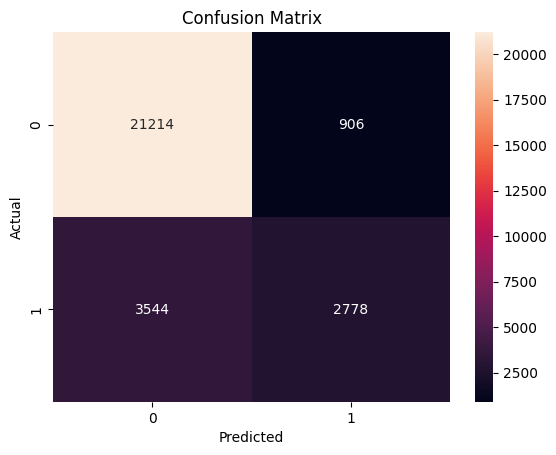

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

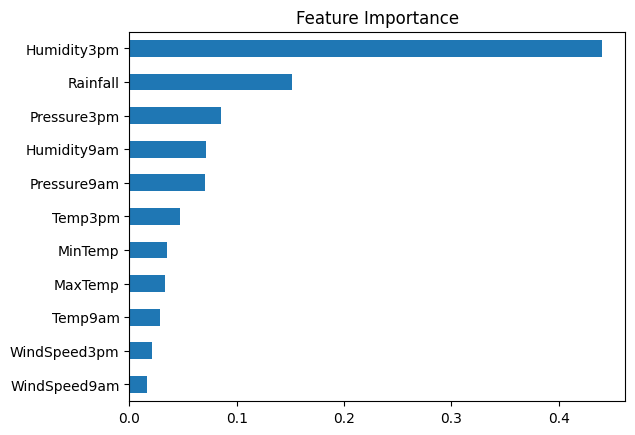

In [12]:
# Feature Importance
importances = model.feature_importances_

feature_importance = pd.Series(importances, index=features)

feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [13]:
# Save Model
pickle.dump(model, open('rainfall_model.pkl','wb'))
pickle.dump(imputer, open('imputer.pkl','wb'))

print('Model saved successfully')

Model saved successfully


In [15]:
print(df.columns)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', '@dropdown'],
      dtype='object')


In [16]:
df['Date'] = pd.to_datetime(df['Date'])


In [17]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [18]:
print(df[['Date', 'Year', 'Month']].head())


        Date  Year  Month
0 2008-12-01  2008     12
1 2008-12-02  2008     12
2 2008-12-03  2008     12
3 2008-12-04  2008     12
4 2008-12-05  2008     12
